In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import umap
import numpy as np
import folium

In [38]:
data_path = 'C:\\Users\\RBess\\OneDrive\\Documents\\Master HES\\2eme semestre\\PI\\Données\\25 features\\Data_communes_28features.csv'
data = pd.read_csv(data_path)

In [39]:
data.head()

,Code,Districts,Libellé,Latitude,Longitude,Voitures de tourisme pour 1000 habitants 2023,Nb. d'accidents avec blessés/tués 2022,Nb. d'accidents avec dommages matériels 2022,Part des voitures électriques 2023,Gare/station,...,Rapport de dépendance des jeunes 2023,Rapport de dépendance des personnes âgées 2023,Taux annuel 2016-2020,Population résidante permanente 2023,Part des élèves du primaire dans la population 2022,Part des élèves du secondaire inférieur dans la population 2022,Coefficient d'imposition communal 2022,Dépenses d'investissement par habitant (moyenne des 3 dernières années 2022),Marge d'autofinancement par habitant 2022,Excédent ou insuffisance de financement par habitant 2022
0,5401,Aigle,Aigle,46.317901,6.968893,473.8,29,44,2.0,1,...,37.7,28.8,1.94,11437,8.96,3.26,66.0,1124.9,791.6,186.0
1,5402,Aigle,Bex,46.251378,7.012388,501.9,16,22,2.9,1,...,40.7,30.9,1.33,8508,9.42,3.40,71.0,596.5,770.2,470.9
2,5403,Aigle,Chessel,46.349573,6.894447,558.8,1,2,3.1,0,...,38.7,26.0,2.97,519,9.09,3.03,65.0,228.7,617.5,303.0
3,5404,Aigle,Corbeyrier,46.349500,6.959754,614.9,4,1,2.1,0,...,31.8,62.3,0.28,464,7.05,3.18,74.0,366.7,564.1,132.5
4,5405,Aigle,Gryon,46.274663,7.063671,566.2,1,3,3.2,1,...,31.1,36.1,0.66,1520,6.84,2.09,73.5,725.1,775.8,526.0


In [40]:
data.describe()

,Code,Latitude,Longitude,Voitures de tourisme pour 1000 habitants 2023,Nb. d'accidents avec blessés/tués 2022,Nb. d'accidents avec dommages matériels 2022,Part des voitures électriques 2023,Gare/station,Surface totale,Altitude maximale,...,Rapport de dépendance des jeunes 2023,Rapport de dépendance des personnes âgées 2023,Taux annuel 2016-2020,Population résidante permanente 2023,Part des élèves du primaire dans la population 2022,Part des élèves du secondaire inférieur dans la population 2022,Coefficient d'imposition communal 2022,Dépenses d'investissement par habitant (moyenne des 3 dernières années 2022),Marge d'autofinancement par habitant 2022,Excédent ou insuffisance de financement par habitant 2022
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.0000,300.000000,300.000000
mean,5665.503333,46.597936,6.582609,626.955667,5.080000,6.563333,3.985667,0.363333,940.953333,866.060000,...,38.539667,29.594333,1.521600,2821.010000,8.654533,3.331567,69.716333,663.8900,696.145667,265.024667
std,157.495947,0.152162,0.232049,102.162932,24.477693,36.138983,1.648703,0.481763,1361.692147,492.856193,...,5.545542,7.772381,1.720762,9162.013737,1.909703,0.931705,6.869756,777.3807,468.697272,737.779959
min,5401.000000,46.207377,6.132561,323.600000,0.000000,0.000000,0.000000,0.000000,29.000000,385.000000,...,22.200000,11.600000,-4.290000,64.000000,0.000000,0.000000,46.000000,0.0000,-657.100000,-2350.000000
25%,5530.750000,46.480369,6.430741,584.825000,0.000000,0.000000,2.875000,0.000000,308.750000,570.000000,...,34.475000,24.475000,0.317500,449.750000,7.545000,2.775000,65.750000,179.6750,380.775000,-27.275000
50%,5658.500000,46.600157,6.577642,627.800000,1.000000,1.500000,3.850000,0.000000,504.500000,697.500000,...,38.050000,28.750000,1.305000,908.000000,8.675000,3.360000,70.500000,457.6000,644.200000,285.200000
75%,5793.500000,46.714540,6.740799,664.750000,5.000000,5.000000,4.800000,1.000000,955.000000,909.750000,...,42.100000,32.825000,2.517500,2360.250000,9.792500,3.892500,75.000000,878.4750,950.900000,564.425000
max,5939.000000,46.956036,7.210699,1513.400000,414.000000,615.000000,13.000000,1.000000,11358.000000,3210.000000,...,59.400000,69.700000,8.780000,144365.000000,15.740000,7.690000,83.000000,8286.4000,2908.400000,5025.200000


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 31 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   Code                                                                          300 non-null    int64  
 1   Districts                                                                     300 non-null    object 
 2   Libellé                                                                       300 non-null    object 
 3   Latitude                                                                      300 non-null    float64
 4   Longitude                                                                     300 non-null    float64
 5   Voitures de tourisme pour 1000 habitants 2023                                 300 non-null    float64
 6   Nb. d'accidents avec blessés/tués 

In [42]:
#Lausanne a des données trop élevées par rapport aux autres communes donc je décide de l'enlever.
index_to_drop = data[data['Libellé'] == 'Lausanne'].index
data = data.drop(index_to_drop)

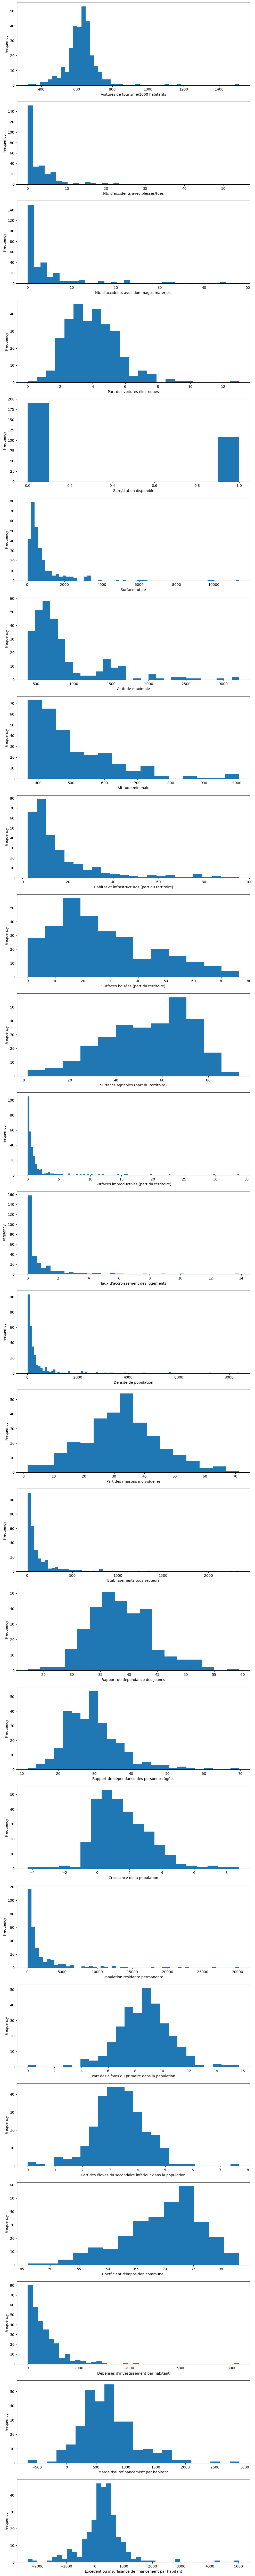

In [43]:
#Distribution des données selon le feature
plt.figure(figsize=(10, 100))

plt.subplot(26, 1, 1)
plt.hist(data["Voitures de tourisme pour 1000 habitants 2023"], bins='auto')
plt.xlabel("Voitures de tourisme/1000 habitants")
plt.ylabel("Frequency")

plt.subplot(26, 1, 2)
plt.hist(data["Nb. d'accidents avec blessés/tués 2022"], bins='auto')
plt.xlabel("Nb. d'accidents avec blessés/tués")
plt.ylabel("Frequency")

plt.subplot(26, 1, 3)
plt.hist(data["Nb. d'accidents avec dommages matériels 2022"], bins='auto')
plt.xlabel("Nb. d'accidents avec dommages matériels")
plt.ylabel("Frequency")

plt.subplot(26, 1, 4)
plt.hist(data["Part des voitures électriques 2023"], bins='auto')
plt.xlabel("Part des voitures électriques")
plt.ylabel("Frequency")

plt.subplot(26, 1, 5)
plt.hist(data["Gare/station"], bins='auto')
plt.xlabel("Gare/station disponible")
plt.ylabel("Frequency")

plt.subplot(26, 1, 6)
plt.hist(data["Surface totale"], bins='auto')
plt.xlabel("Surface totale")
plt.ylabel("Frequency")

plt.subplot(26, 1, 7)
plt.hist(data["Altitude maximale"], bins='auto')
plt.xlabel("Altitude maximale")
plt.ylabel("Frequency")

plt.subplot(26, 1, 8)
plt.hist(data["Altitude minimale"], bins='auto')
plt.xlabel("Altitude minimale")
plt.ylabel("Frequency")

plt.subplot(26, 1, 9)
plt.hist(data["Habitat et infrastructures (part du territoire) 2020"], bins='auto')
plt.xlabel("Habitat et infrastructures (part du territoire)")
plt.ylabel("Frequency")

plt.subplot(26, 1, 10)
plt.hist(data["Surfaces boisées (part du territoire) 2020"], bins='auto')
plt.xlabel("Surfaces boisées (part du territoire)")
plt.ylabel("Frequency")

plt.subplot(26, 1, 11)
plt.hist(data["Surfaces agricoles (part du territoire) 2020"], bins='auto')
plt.xlabel("Surfaces agricoles (part du territoire)")
plt.ylabel("Frequency")

plt.subplot(26, 1, 12)
plt.hist(data["Surfaces improductives (part du territoire) 2020"], bins='auto')
plt.xlabel("Surfaces improductives (part du territoire)")
plt.ylabel("Frequency")

plt.subplot(26, 1, 13)
plt.hist(data["Taux d'accroissement des logements 2021"], bins='auto')
plt.xlabel("Taux d'accroissement des logements")
plt.ylabel("Frequency")

plt.subplot(26, 1, 14)
plt.hist(data["Densité de population 2023"], bins='auto')
plt.xlabel("Densité de population")
plt.ylabel("Frequency")

plt.subplot(26, 1, 15)
plt.hist(data["Part des maisons individuelles 2022"], bins='auto')
plt.xlabel("Part des maisons individuelles")
plt.ylabel("Frequency")

plt.subplot(26, 1, 16)
plt.hist(data["Etablissements tous secteurs 2021"], bins='auto')
plt.xlabel("Etablissements tous secteurs")
plt.ylabel("Frequency")

plt.subplot(26, 1, 17)
plt.hist(data["Rapport de dépendance des jeunes 2023"], bins='auto')
plt.xlabel("Rapport de dépendance des jeunes")
plt.ylabel("Frequency")

plt.subplot(26, 1, 18)
plt.hist(data["Rapport de dépendance des personnes âgées 2023"], bins='auto')
plt.xlabel("Rapport de dépendance des personnes âgées")
plt.ylabel("Frequency")

plt.subplot(26, 1, 19)
plt.hist(data["Taux annuel 2016-2020"], bins='auto')
plt.xlabel("Croissance de la population")
plt.ylabel("Frequency")

plt.subplot(26, 1, 20)
plt.hist(data["Population résidante permanente 2023"], bins='auto')
plt.xlabel("Population résidante permanente")
plt.ylabel("Frequency")

plt.subplot(26, 1, 21)
plt.hist(data["Part des élèves du primaire dans la population 2022"], bins='auto')
plt.xlabel("Part des élèves du primaire dans la population")
plt.ylabel("Frequency")

plt.subplot(26, 1, 22)
plt.hist(data["Part des élèves du secondaire inférieur dans la population 2022"], bins='auto')
plt.xlabel("Part des élèves du secondaire inférieur dans la population")
plt.ylabel("Frequency")

plt.subplot(26, 1, 23)
plt.hist(data["Coefficient d'imposition communal 2022"], bins='auto')
plt.xlabel("Coefficient d'imposition communal")
plt.ylabel("Frequency")

plt.subplot(26, 1, 24)
plt.hist(data["Dépenses d'investissement par habitant (moyenne des 3 dernières années 2022)"], bins='auto')
plt.xlabel("Dépenses d'investissement par habitant")
plt.ylabel("Frequency")

plt.subplot(26, 1, 25)
plt.hist(data["Marge d'autofinancement par habitant 2022"], bins='auto')
plt.xlabel("Marge d'autofinancement par habitant")
plt.ylabel("Frequency")

plt.subplot(26, 1, 26)
plt.hist(data["Excédent ou insuffisance de financement par habitant 2022"], bins='auto')
plt.xlabel("Excédent ou insuffisance de financement par habitant")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

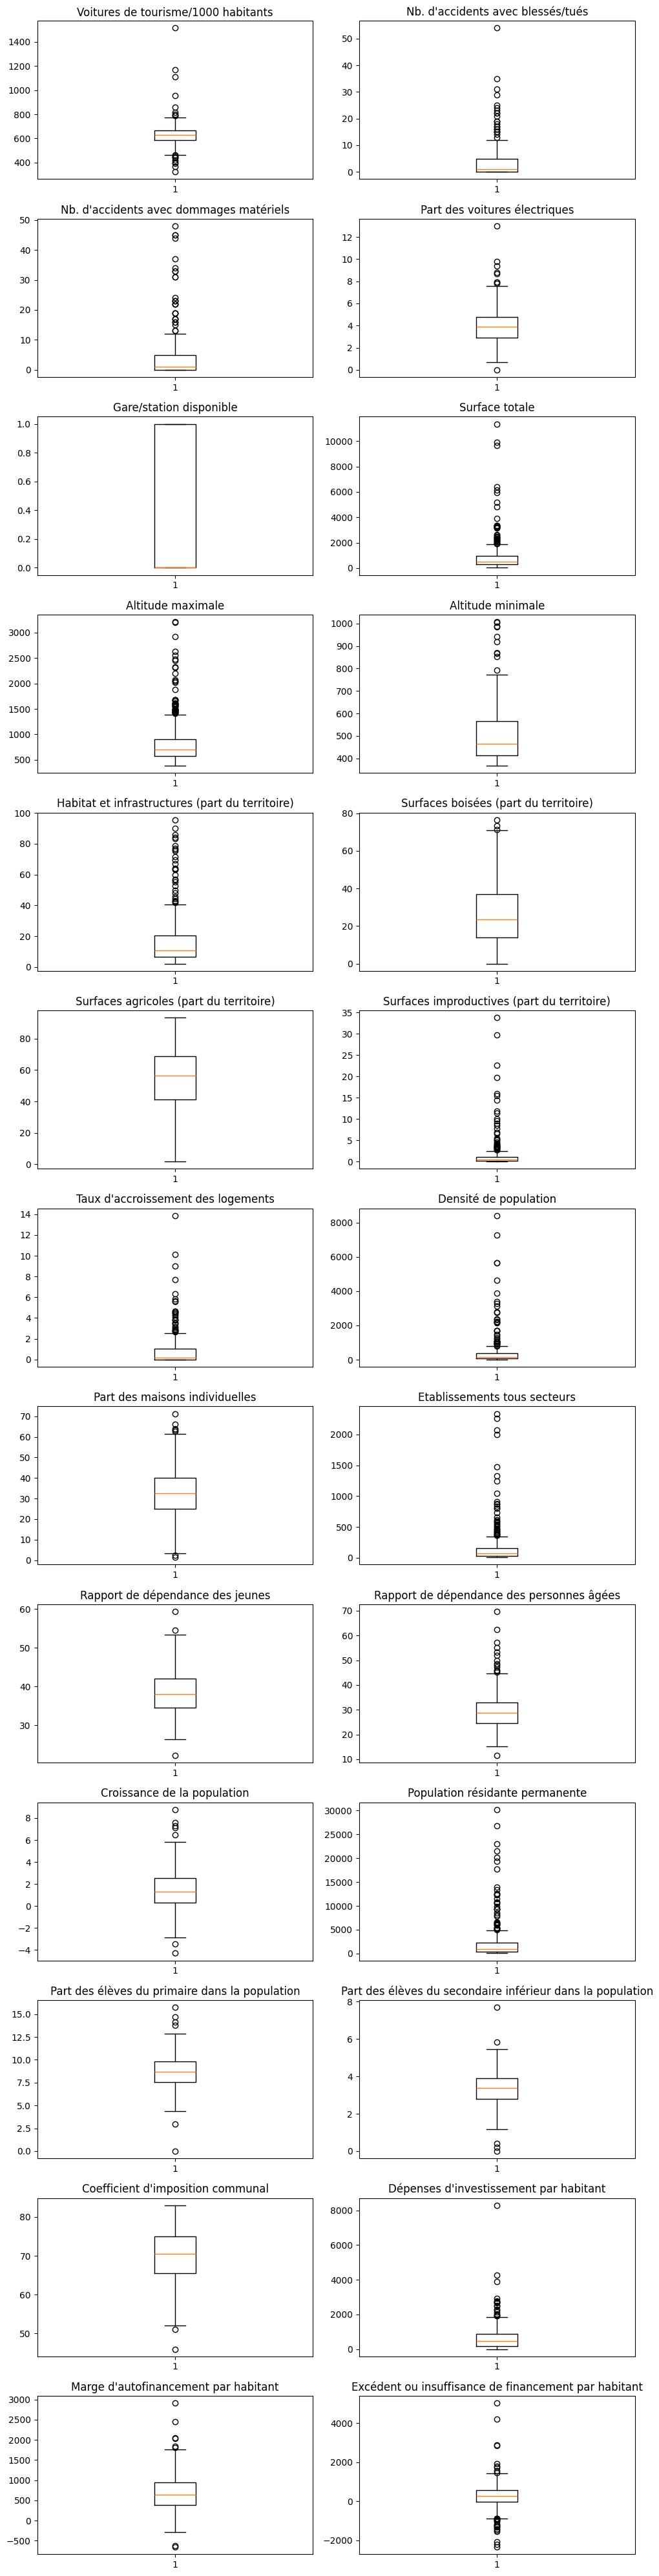

<Figure size 640x480 with 0 Axes>

In [44]:
#Observation de potentielles valeurs aberrantes
plt.figure(figsize=(10, 40))

plt.subplot(13, 2, 1)
plt.boxplot(data["Voitures de tourisme pour 1000 habitants 2023"])
plt.title("Voitures de tourisme/1000 habitants")

plt.subplot(13, 2, 2)
plt.boxplot(data["Nb. d'accidents avec blessés/tués 2022"])
plt.title("Nb. d'accidents avec blessés/tués")

plt.subplot(13, 2, 3)
plt.boxplot(data["Nb. d'accidents avec dommages matériels 2022"])
plt.title("Nb. d'accidents avec dommages matériels")

plt.subplot(13, 2, 4)
plt.boxplot(data["Part des voitures électriques 2023"])
plt.title("Part des voitures électriques")

plt.subplot(13, 2, 5)
plt.boxplot(data["Gare/station"])
plt.title("Gare/station disponible")

plt.subplot(13, 2, 6)
plt.boxplot(data["Surface totale"])
plt.title("Surface totale")

plt.subplot(13, 2, 7)
plt.boxplot(data["Altitude maximale"])
plt.title("Altitude maximale")

plt.subplot(13, 2, 8)
plt.boxplot(data["Altitude minimale"])
plt.title("Altitude minimale")

plt.subplot(13, 2, 9)
plt.boxplot(data["Habitat et infrastructures (part du territoire) 2020"])
plt.title("Habitat et infrastructures (part du territoire)")

plt.subplot(13, 2, 10)
plt.boxplot(data["Surfaces boisées (part du territoire) 2020"])
plt.title("Surfaces boisées (part du territoire)")

plt.subplot(13, 2, 11)
plt.boxplot(data["Surfaces agricoles (part du territoire) 2020"])
plt.title("Surfaces agricoles (part du territoire)")

plt.subplot(13, 2, 12)
plt.boxplot(data["Surfaces improductives (part du territoire) 2020"])
plt.title("Surfaces improductives (part du territoire)")

plt.subplot(13, 2, 13)
plt.boxplot(data["Taux d'accroissement des logements 2021"])
plt.title("Taux d'accroissement des logements")

plt.subplot(13, 2, 14)
plt.boxplot(data["Densité de population 2023"])
plt.title("Densité de population")

plt.subplot(13, 2, 15)
plt.boxplot(data["Part des maisons individuelles 2022"])
plt.title("Part des maisons individuelles")

plt.subplot(13, 2, 16)
plt.boxplot(data["Etablissements tous secteurs 2021"])
plt.title("Etablissements tous secteurs")

plt.subplot(13, 2, 17)
plt.boxplot(data["Rapport de dépendance des jeunes 2023"])
plt.title("Rapport de dépendance des jeunes")

plt.subplot(13, 2, 18)
plt.boxplot(data["Rapport de dépendance des personnes âgées 2023"])
plt.title("Rapport de dépendance des personnes âgées")

plt.subplot(13, 2, 19)
plt.boxplot(data["Taux annuel 2016-2020"])
plt.title("Croissance de la population")

plt.subplot(13, 2, 20)
plt.boxplot(data["Population résidante permanente 2023"])
plt.title("Population résidante permanente")

plt.subplot(13, 2, 21)
plt.boxplot(data["Part des élèves du primaire dans la population 2022"])
plt.title("Part des élèves du primaire dans la population")

plt.subplot(13, 2, 22)
plt.boxplot(data["Part des élèves du secondaire inférieur dans la population 2022"])
plt.title("Part des élèves du secondaire inférieur dans la population")

plt.subplot(13, 2, 23)
plt.boxplot(data["Coefficient d'imposition communal 2022"])
plt.title("Coefficient d'imposition communal")

plt.subplot(13, 2, 24)
plt.boxplot(data["Dépenses d'investissement par habitant (moyenne des 3 dernières années 2022)"])
plt.title("Dépenses d'investissement par habitant")

plt.subplot(13, 2, 25)
plt.boxplot(data["Marge d'autofinancement par habitant 2022"])
plt.title("Marge d'autofinancement par habitant")

plt.subplot(13, 2, 26)
plt.boxplot(data["Excédent ou insuffisance de financement par habitant 2022"])
plt.title("Excédent ou insuffisance de financement par habitant")

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

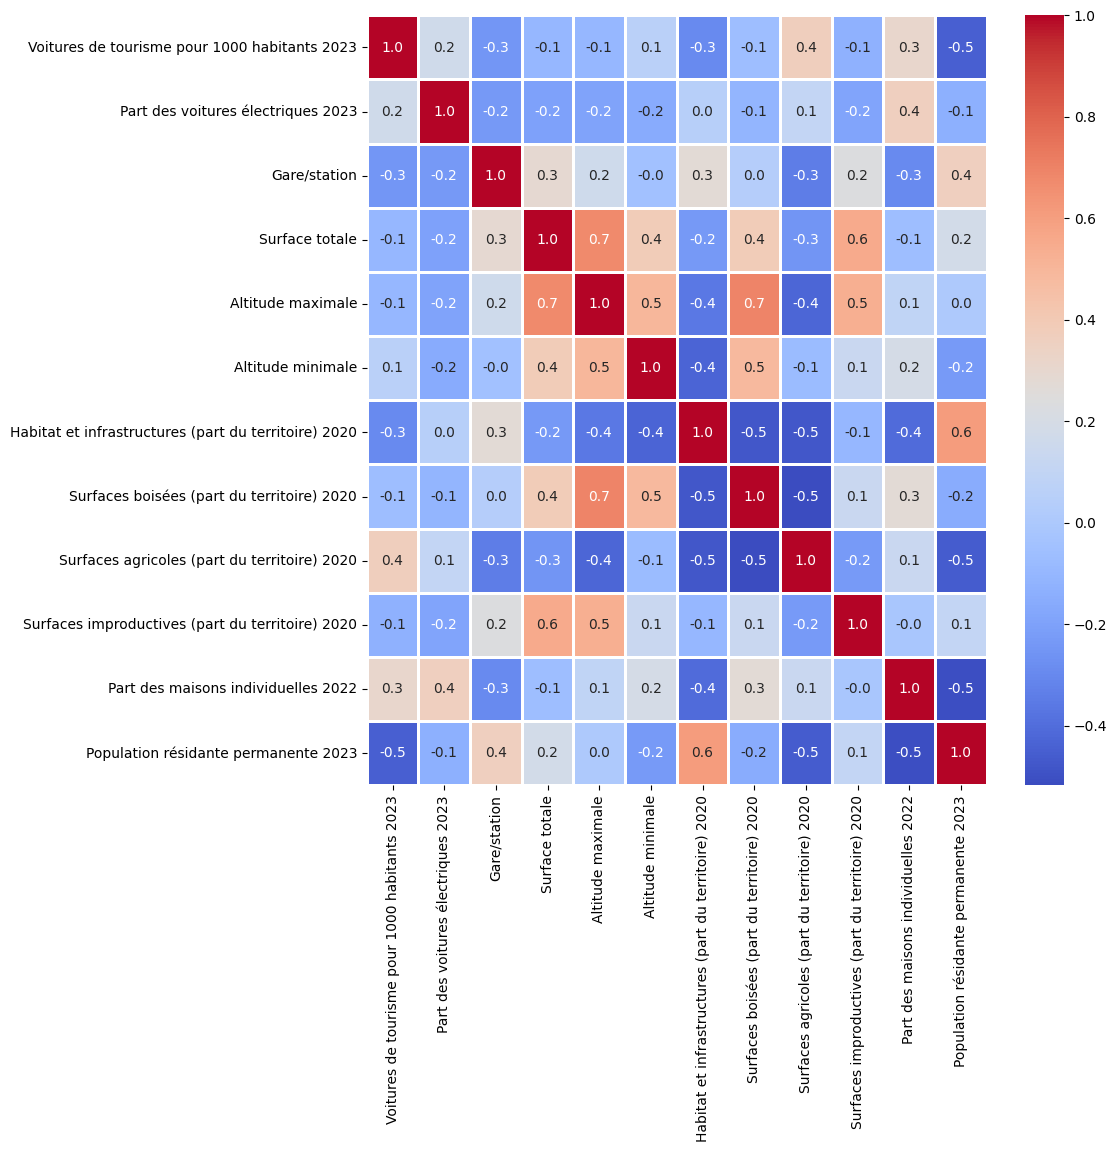

In [45]:
#Tableau de corrélation entre les features
plt.figure(figsize=(10, 10))

data_clustering = data.drop(columns=[
    'Code',
    'Districts',
    'Libellé',
    'Latitude',
    'Longitude',
    "Nb. d'accidents avec blessés/tués 2022",
    "Nb. d'accidents avec dommages matériels 2022",
    'Etablissements tous secteurs 2021',
    'Densité de population 2023',
    "Coefficient d'imposition communal 2022", 
    "Dépenses d'investissement par habitant (moyenne des 3 dernières années 2022)", 
    "Marge d'autofinancement par habitant 2022", 
    "Excédent ou insuffisance de financement par habitant 2022",
    "Rapport de dépendance des jeunes 2023", 
    "Rapport de dépendance des personnes âgées 2023", 
    "Taux annuel 2016-2020",
    "Part des élèves du primaire dans la population 2022", 
    "Part des élèves du secondaire inférieur dans la population 2022",
    "Taux d'accroissement des logements 2021"
])

#Données à retirer car plus informatives que utiles pour le clusthering :
#Code, Districts, Libellé, Latitude, Longitude

#Possible de retirer les features suivant avec forte corrélation :
#Nb. d'accidents avec blessés/tués 2022
#Nb. d'accidents avec dommages matériels 2022
#Etablissements tous secteurs 2021
#Densité de population 2023

#Retirer données dans le domaine des finances publiques :
#Coefficient d'imposition communal 2022
#Dépenses d'investissement par habitant (moyenne des 3 dernières années 2022)
#Marge d'autofinancement par habitant 2022 
#Excédent ou insuffisance de financement par habitant 2022

#Enlever pour mieux comprendre la différenciation des clusther :
#Rapport de dépendance des jeunes 2023
#Rapport de dépendance des personnes âgées 2023 
#Taux annuel 2016-2020
#Part des élèves du primaire dans la population 2022
#Part des élèves du secondaire inférieur dans la population 2022
#Taux d'accroissement des logements 2021

correlation_matrix = data_clustering.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap="coolwarm", linewidths=1)

plt.show()

In [46]:
# Normalisation des données
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_clustering)
print(data_normalized[:2])

[[-1.52923868 -1.2078347   1.32985658  0.53426106  0.3797439  -0.96255268
   0.67951935  0.543539   -1.35927329  0.93683554 -1.58241381  2.22336579]
 [-1.25042268 -0.6614768   1.32985658  6.47256127  4.74625243 -0.88398232
  -0.68116216  0.45259749 -1.52174489  8.64860137 -0.23205548  1.50689916]]


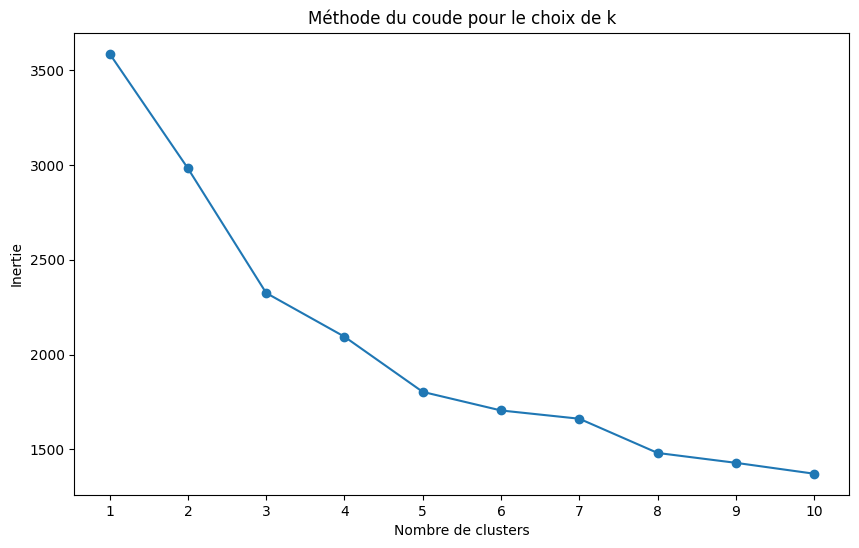

In [47]:
# Trouver le nombre optimal de clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_normalized)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Méthode du coude pour le choix de k')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.xticks(range(1, 11))
plt.show()

In [48]:
# Appliquer K-means avec 4 clusters (mon choix)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(data_normalized)
data['Cluster'] = clusters
data[['Libellé', 'Cluster']].head(10)

,Libellé,Cluster
0,Aigle,3
1,Bex,2
2,Chessel,1
3,Corbeyrier,2
4,Gryon,2
5,Lavey-Morcles,2
6,Leysin,2
7,Noville,1
8,Ollon,2
9,Ormont-Dessous,2


In [49]:
#Représentant pour chaque cluster
data['Cluster'].value_counts()

Cluster
1    153
0     65
2     59
3     22
Name: count, dtype: int64

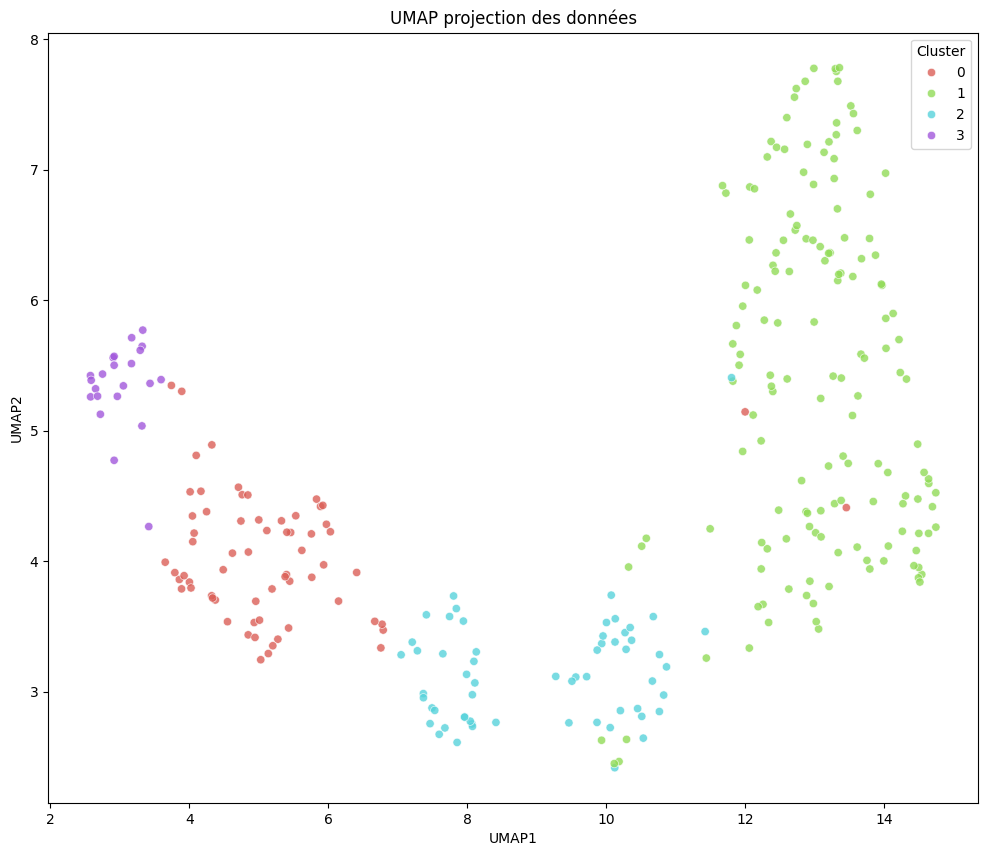

In [50]:
# Configuration d'UMAP
reducer = umap.UMAP()
embedding = reducer.fit_transform(data_normalized)
embedding_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])
embedding_df['Cluster'] = clusters

plt.figure(figsize=(12, 10))
sns.scatterplot(
    x="UMAP1", y="UMAP2",
    hue="Cluster",
    palette=sns.color_palette("hls", len(set(clusters))),
    data=embedding_df,
    legend="full",
    alpha=0.8
)
plt.title('UMAP projection des données')
plt.show()

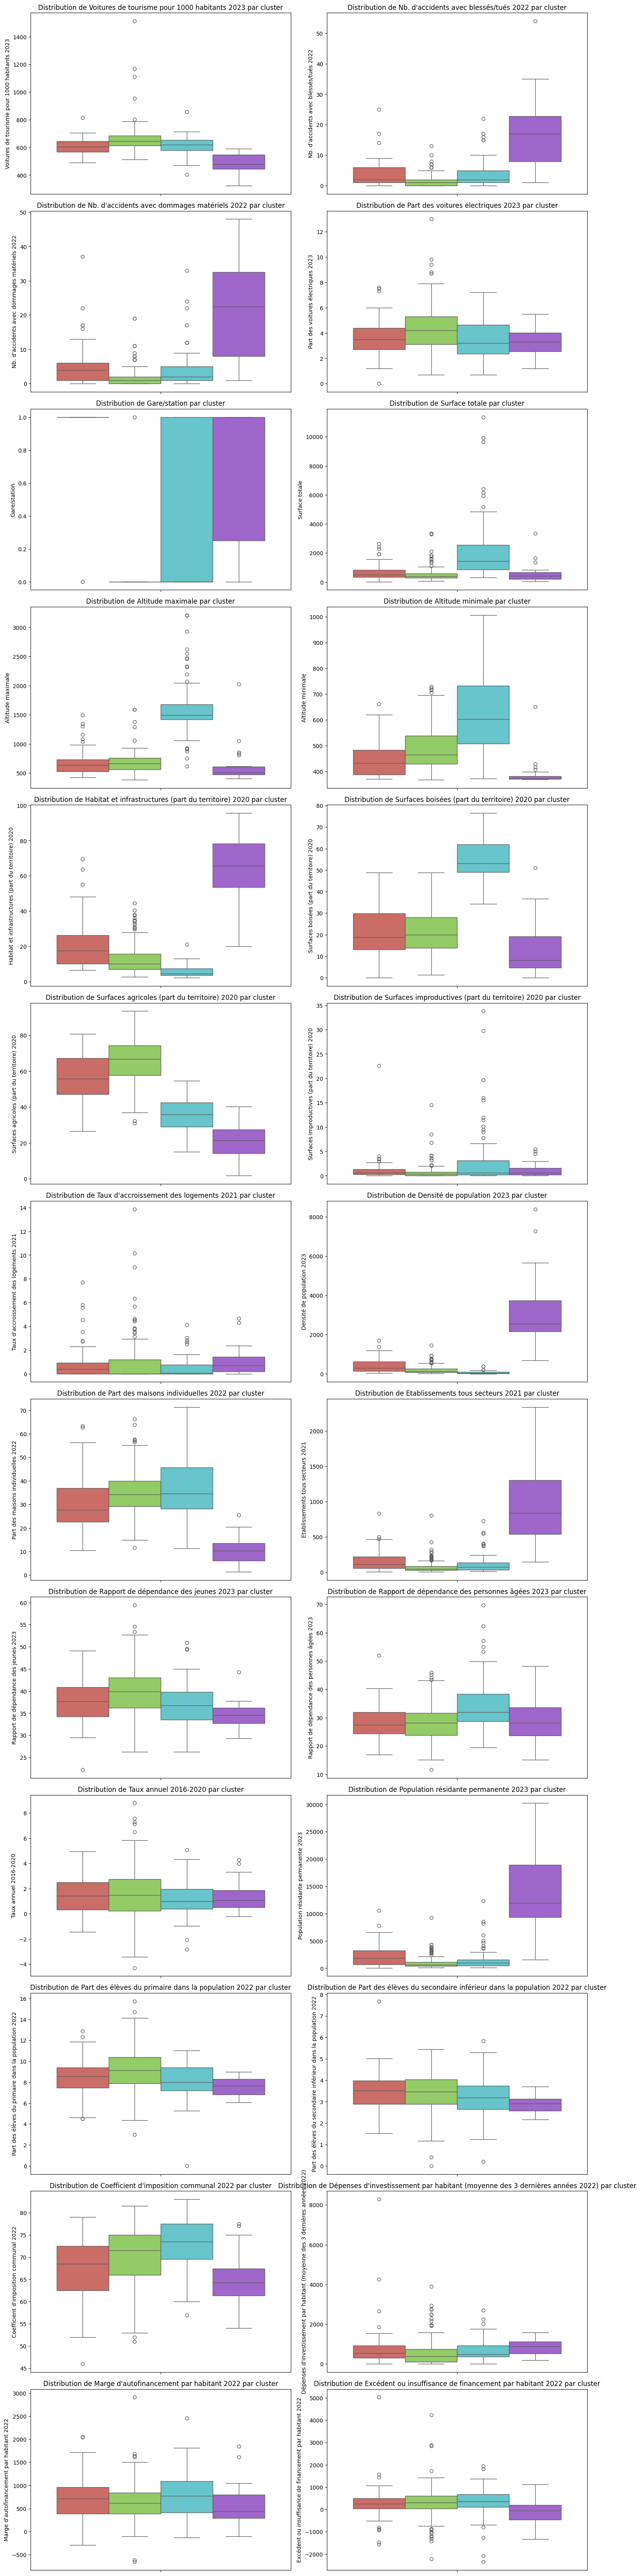

In [51]:
#Visualisation des données par cluster selon chaque feature
features_to_plot = [
    "Voitures de tourisme pour 1000 habitants 2023", 
    "Nb. d'accidents avec blessés/tués 2022", 
    "Nb. d'accidents avec dommages matériels 2022", 
    "Part des voitures électriques 2023", 
    "Gare/station", 
    "Surface totale", 
    "Altitude maximale", 
    "Altitude minimale", 
    "Habitat et infrastructures (part du territoire) 2020", 
    "Surfaces boisées (part du territoire) 2020", 
    "Surfaces agricoles (part du territoire) 2020", 
    "Surfaces improductives (part du territoire) 2020", 
    "Taux d'accroissement des logements 2021", 
    "Densité de population 2023", 
    "Part des maisons individuelles 2022", 
    "Etablissements tous secteurs 2021", 
    "Rapport de dépendance des jeunes 2023", 
    "Rapport de dépendance des personnes âgées 2023", 
    "Taux annuel 2016-2020", 
    "Population résidante permanente 2023", 
    "Part des élèves du primaire dans la population 2022", 
    "Part des élèves du secondaire inférieur dans la population 2022", 
    "Coefficient d'imposition communal 2022", 
    "Dépenses d'investissement par habitant (moyenne des 3 dernières années 2022)", 
    "Marge d'autofinancement par habitant 2022", 
    "Excédent ou insuffisance de financement par habitant 2022"
]

n_features = len(features_to_plot)
n_cols = 2
n_rows = (n_features + 2) // n_cols

plt.figure(figsize=(15, 5 * n_rows))
for i, feature in enumerate(features_to_plot):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(hue='Cluster', y=feature, data=data, palette=sns.color_palette("hls", len(set(clusters))), legend=False)
    plt.title(f'Distribution de {feature} par cluster')
    
plt.tight_layout()
plt.show()

In [52]:
# Carte des communes selon leur cluster
map_vaud = folium.Map(location=[46.6183, 6.5575], zoom_start=9)
palette = sns.color_palette("hls", len(set(data['Cluster'])))
colors_hex = palette.as_hex()

for _, row in data.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color=colors_hex[int(row['Cluster'])],
        fill=True,
        fill_color=colors_hex[int(row['Cluster'])],
        fill_opacity=0.7,
        popup=row['Libellé']
    ).add_to(map_vaud)
map_vaud

In [53]:
#Critères : Dans le cluster 0 disposant de gare/station et une part de voitures électriques plus grande que 3 %
communes_avec_critères = data[(data['Cluster'] == 0) & (data['Gare/station'] == 1) & (data['Part des voitures électriques 2023'] >= 3)]
# 3,3 % de voitures électriques en Suisse (source : https://www.bfs.admin.ch/bfs/fr/home/statistiques/mobilite-transports/infrastructures-transport-vehicules/vehicules/vehicules-routiers-parc-taux-motorisation.html)

# Comptage du nombre de communes qui répondent à ces critères
print("Nbr. de communes correspondant aux critères :", communes_avec_critères.shape[0])
print("\nNom des communes correspondant aux critères :")
noms_communes = communes_avec_critères['Libellé'].tolist()
for nom in noms_communes:
    print("- ", nom)

Nbr. de communes correspondant aux critères : 43

Nom des communes correspondant aux critères :
-  Roche
-  Ballens
-  Faoug
-  Cossonay
-  Vufflens-la-Ville
-  Assens
-  Bercher
-  Echallens
-  Etagnières
-  Fey
-  Grandson
-  Onnens
-  Cheseaux-sur-Lausanne
-  Jouxtens-Mézery
-  Romanel-sur-Lausanne
-  Chexbres
-  Puidoux
-  Bourg-en-Lavaux
-  Chigny
-  Denges
-  Echandens
-  Etoy
-  Lonay
-  Saint-Prex
-  Tolochenaz
-  Vufflens-le-Château
-  Yens
-  Coppet
-  Genolier
-  Givrins
-  Mies
-  Tannay
-  Trélex
-  Arnex-sur-Orbe
-  Bavois
-  Croy
-  Chevroux
-  Henniez
-  Trey
-  Chardonne
-  Jongny
-  Valeyres-sous-Montagny
-  Yvonand


In [54]:
# Carte des communes avec critères
map_vaud = folium.Map(location=[46.6183, 6.5575], zoom_start=9)
for _, row in communes_avec_critères.iterrows():
    cluster_color = colors_hex[int(row['Cluster'])]
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color=cluster_color,
        fill=True,
        fill_color=cluster_color,
        fill_opacity=0.7,
        popup=row['Libellé']
    ).add_to(map_vaud)
map_vaud